                             Problem Statement: Employee Retention Prediction

The task at hand is to develop a predictive analysis model that can accurately identify employees who are most likely to leave the company in the near future. This employee retention prediction is crucial for businesses to proactively forecast employee behavior and take necessary measures to retain valuable talent, ensuring that the company doesn't lose essential manpower.

By leveraging data and predictive modeling techniques, we aim to create a solution that can effectively identify the factors contributing to employee attrition and develop insights into which employees are at the highest risk of leaving. This information will enable businesses to implement targeted retention strategies and interventions to increase employee satisfaction, engagement, and ultimately reduce attrition rates.

The desired outcome is to build a reliable model that can predict employee churn with a high level of accuracy, allowing organizations to proactively address retention concerns, retain valuable employees, and maintain a stable and productive workforce.

In [2]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# For data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# For saving models
import pickle

In [3]:
# Load dataset into a dataframe

df0 = pd.read_csv(r'C:\Users\agozi\Desktop\DATA\HR_capstone_dataset.CSV', encoding='latin-1')
df0 = pd.DataFrame(df0)

# Display first few rows of the dataframe
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [4]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
# Display all column names to see if any needs rename for the purpose of this analysis 
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0 = df0.rename(columns={'satisfaction_level': 'satisfactory_level',
                    'time_spend_company': 'work_duration',
                    'left': 'employment_status',
                   'Work_accident': 'work_accident',
                   'average_montly_hours': 'average_monthly_hours',
                   'Department': 'department'})

# check the newly renamed columns 
print(df0.columns)

Index(['satisfactory_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'work_duration', 'work_accident',
       'employment_status', 'promotion_last_5years', 'department', 'salary'],
      dtype='object')


In [7]:
# Check for missing values
df0.isnull().sum()

satisfactory_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
work_duration            0
work_accident            0
employment_status        0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [8]:
# Check for duplicates
duplicates = df0.duplicated()
duplicate_count = duplicates.sum()
print("Number of duplicates:", duplicate_count)

Number of duplicates: 3008


In [9]:
# Inspect some rows containing duplicates 
df0[df0.duplicated()].head()

,satisfactory_level,last_evaluation,number_project,average_monthly_hours,work_duration,work_accident,employment_status,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of the new dataframe
df1.head()

,satisfactory_level,last_evaluation,number_project,average_monthly_hours,work_duration,work_accident,employment_status,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


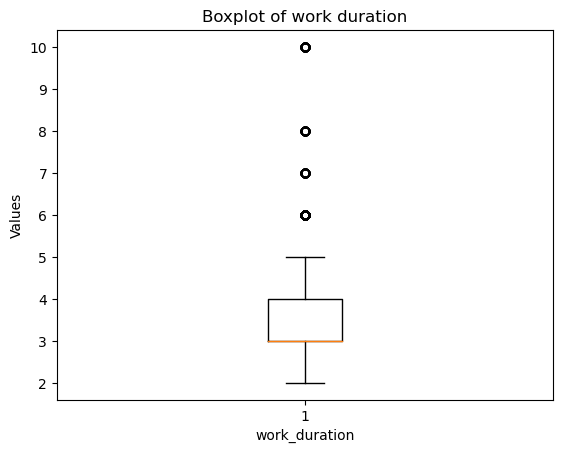

In [11]:
# Create a boxplot to visualize distribution of `work duration` and detect any outliers
plt.boxplot(df1['work_duration'])
plt.xlabel('work_duration')
plt.ylabel('Values')
plt.title('Boxplot of work duration')
plt.show()

In [12]:
# Determine the number of rows containing outliers

q1 = df1['work_duration'].quantile(0.25)
q3 = df1['work_duration'].quantile(0.75)
iqr = q3 - q1

#define bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

#define outliers
outliers = df1[(df1['work_duration'] < lower_bound) | (df1['work_duration'] > upper_bound)]
num_outliers = len(outliers)

print("Number of rows containing outliers:", num_outliers)

Number of rows containing outliers: 824


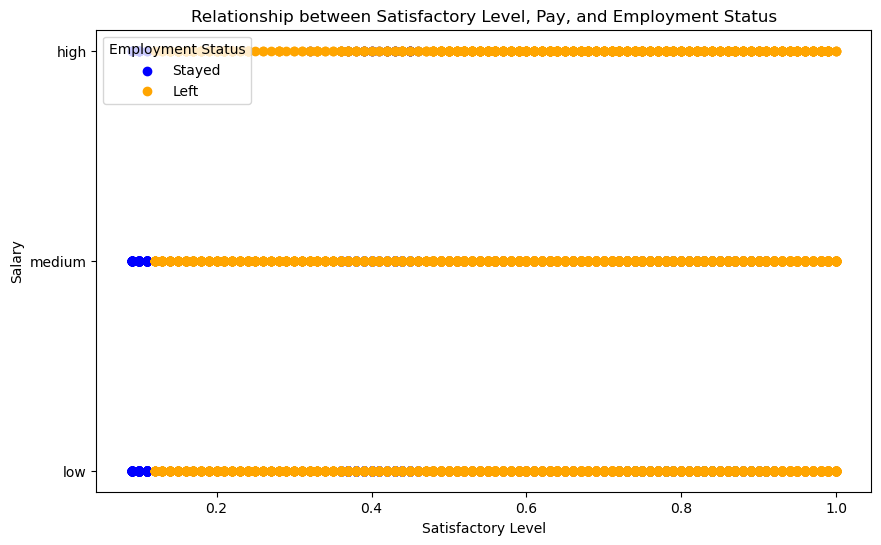

In [16]:
# Create a plot to visualize the relationship between Satisfactory Level, Pay, and Employment Status

employment_categories = df1['employment_status'].unique()

plt.figure(figsize=(10, 6))
for category in employment_categories:
    subset = df1[df1['employment_status'] == category]
    color = 'orange' if category == 0 else 'blue'  # Assigning color based on employment status
    label = 'Left' if category == 0 else 'Stayed'  # Assigning label based on employment status
    plt.scatter(subset['satisfactory_level'], subset['salary'], c=color, label=label)

plt.xlabel('Satisfactory Level')
plt.ylabel('Salary')
plt.title('Relationship between Satisfactory Level, Pay, and Employment Status')
plt.legend(title='Employment Status')
plt.show()


The graph above illustrates the relationship between pay range, satisfactory level, and the employment status of employees. From the distribution depicted in the chart, it is evident that a significant number of employees decided to leave the organization, regardless of their pay or satisfactory level. On the other hand, a smaller group of employees chose to stay, but their satisfaction levels were notably low. This suggests that these employees were not content with their job but felt compelled to remain in their positions for various reasons.

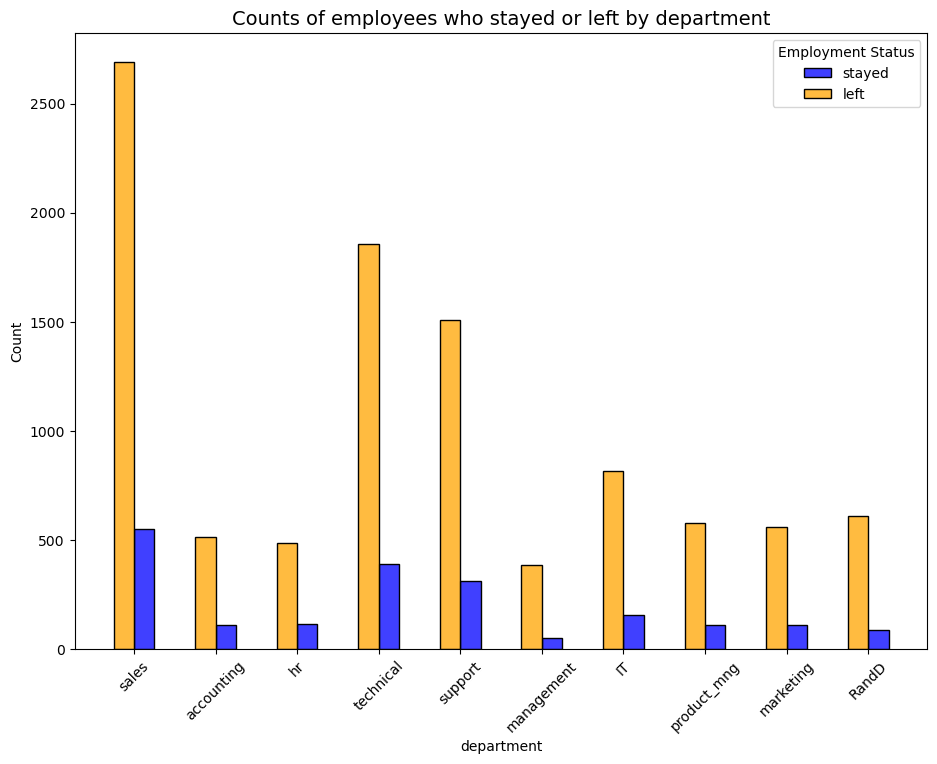

In [22]:
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't

plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='employment_status', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5,
             palette={0: 'orange', 1: 'blue'})
plt.xticks(rotation='45')
plt.title('Counts of employees who stayed or left by department', fontsize=14)

# Modify legend labels
legend_labels = ['stayed', 'left']
plt.legend(title='Employment Status', labels=legend_labels)

plt.show()


The stacked bar chart above illustrates the counts of employees who stayed or left the company categorized by their respective departments. Upon analyzing the graph, it becomes evident that the sales, technical, and support departments have been significantly affected, ranking the highest in terms of the count of employees who left the company.

Specifically, the sales department witnessed a departure of over 2500 employees, followed by the technical department with approximately 2000 employees, and the support department with around 1500 employees. These numbers indicate a substantial loss of workforce and talents in these departments.

Furthermore, when considering the entire range of departments, it becomes clear that the percentage of employees who left the company far exceeds the percentage of those who decided to stay. This suggests a significant imbalance in employee retention, indicating a critical concern for the firm. Addressing this issue and implementing strategies to improve employee retention across departments is crucial for maintaining a stable and productive workforce.

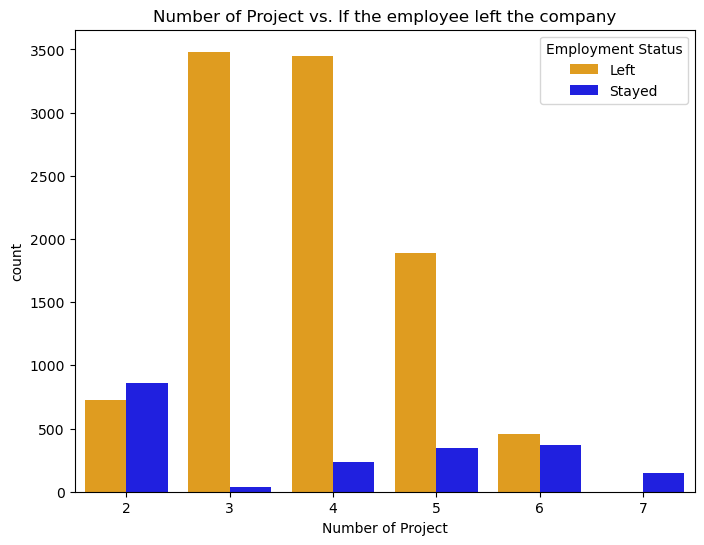

In [23]:
# 'Number of Project' vs 'Employment Status' count plot

plt.figure(figsize=(8, 6))
sns.countplot(data=df1, x='number_project', hue='employment_status', palette={0: 'orange', 1: 'blue'})

plt.xlabel('Number of Project')
plt.title('Number of Project vs. If the employee left the company')
plt.legend(title='Employment Status', labels=['Left', 'Stayed'])

plt.show()


The diagram above examines the relationship between the number of projects an employee has handled and whether they left the company or not. The analysis reveals some interesting findings.

Firstly, employees who have handled 3 or 4 projects have the highest number of individuals who left the company, with approximately 3500 employees in each category. Similarly, employees who have worked on 5 projects also experienced a departure of around 3500 employees. This suggests that there may be certain factors or challenges associated with these project loads that contribute to employee attrition.

On the contrary, employees who have handled 7 projects are relatively few in number, and none of them have left the firm. This observation might be attributed to the possibility of these employees attaining management or supervisory positions, which could provide job stability and greater comfort within the company.

Another notable group is employees who have worked on around 2 projects. The analysis shows a slightly higher percentage of employees in this category who chose to stay with the company. This finding could be attributed to the likelihood that these employees are relatively new to the organization and have not yet faced significant project-related challenges or developed a strong desire to seek opportunities elsewhere.

Overall, the diagram provides insights into the relationship between project load and employee retention, highlighting patterns that can help organizations understand the dynamics of employee turnover and tailor strategies to improve retention rates.

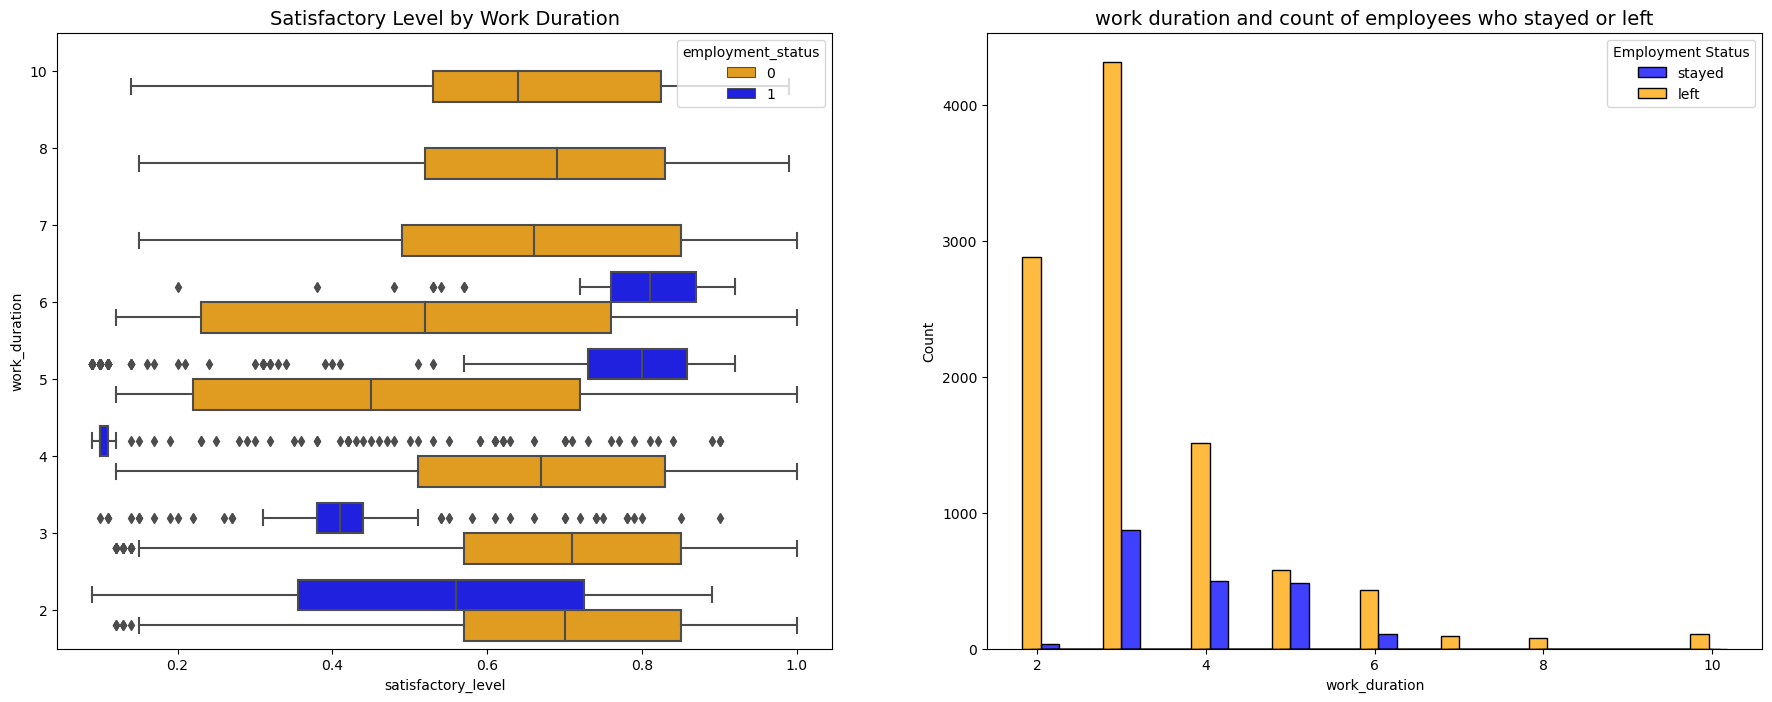

In [28]:
# Create boxplot showing distributions of `satisfactory_level` by `work_duration`, comparing employees who stayed versus those who left
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

sns.boxplot(data=df1, x='satisfactory_level', 
            y='work_duration', 
            hue='employment_status', 
            hue_order=[0, 1], 
            orient="h", ax=ax[0],
            palette={0: 'orange', 1: 'blue'})  # Assigning color labels for the boxplot
ax[0].invert_yaxis()
ax[0].set_title('Satisfactory Level by Work Duration', fontsize=14)

tenure_stay = df1[df1['employment_status'] == 0]['work_duration']
tenure_left = df1[df1['employment_status'] == 1]['work_duration']
sns.histplot(data=df1, x='work_duration', hue='employment_status', hue_order=[0, 1], multiple='dodge', shrink=5, ax=ax[1],
             palette={0: 'orange', 1: 'blue'})  # Assigning color labels for the histogram
ax[1].set_title('work duration and count of employees who stayed or left', fontsize=14)

# Modify legend labels
legend_labels = ['stayed', 'left']
plt.legend(title='Employment Status', labels=legend_labels)

plt.show()


From the given plot, several observations can be made:

Employees who left the company can be classified into two general categories based on their satisfaction levels and tenure. One category consists of dissatisfied employees with shorter tenures. These individuals may have experienced low job satisfaction and decided to leave relatively early in their employment. The second category includes very satisfied employees with medium-length tenures who unexpectedly chose to leave. Exploring the reasons behind their departure could provide valuable insights.

Notably, employees who had a tenure of four years and left the company exhibited an unusually low satisfaction level. It would be worthwhile to investigate any company policy changes or other factors that might have influenced this specific group of employees at the four-year mark. Understanding these circumstances could help identify potential areas for improvement or policy adjustments.

The plot suggests that the longest-tenured employees did not leave the company. Their satisfaction levels aligned with those of newer employees who decided to stay. This finding indicates that there might be factors, such as job stability, career progression, or a positive work environment, that contribute to the retention of these long-term employees.

The histogram representation reveals that there are relatively few employees with longer tenures. This observation raises the possibility that these employees may hold higher-ranking positions and receive higher salaries. It suggests a potential correlation between tenure, job level, and compensation within the organization.

These observations highlight key insights regarding employee satisfaction, tenure, and retention within the company. Further analysis and investigation into the factors influencing these patterns can provide valuable information for decision-making, policy adjustments, and targeted retention strategies.

In [32]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['employment_status'])['satisfactory_level'].agg([np.mean,np.median])

,mean,median
employment_status,,
0,0.667365,0.69
1,0.440271,0.41


As expected, the mean and median satisfaction scores of employees who left are lower than those
of employees who stayed. Interestingly, among employees who stayed, the mean satisfaction score
appears to be slightly below the median score. This indicates that satisfaction levels among those
who stayed might be skewed to the left.

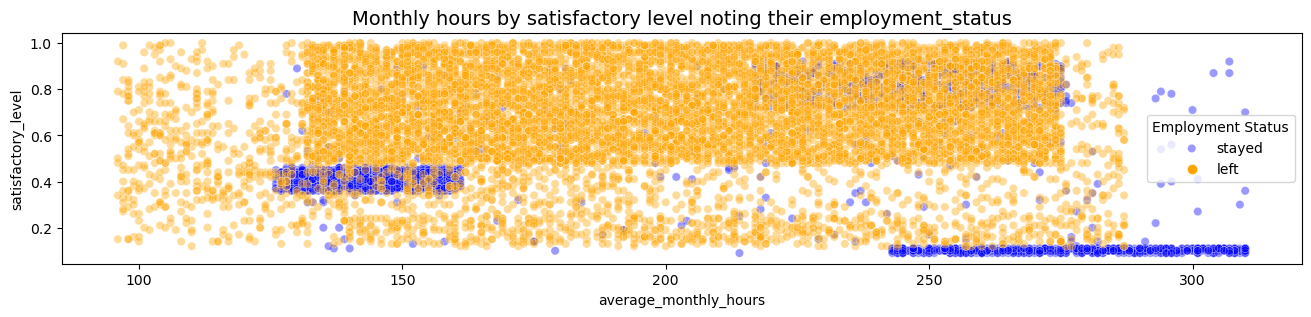

In [34]:
# Create plot to examine relationship between `average_monthly_hours` and `satisfaction_level`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours',
                y='satisfactory_level', 
                hue='employment_status', 
                palette={0: 'orange', 1: 'blue'}, 
                alpha=0.4)
#plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.title('Monthly hours by satisfactory level noting their employment_status', fontsize='14')

# Modify legend labels
legend_labels = ['stayed', 'left']
plt.legend(title='Employment Status', labels=legend_labels)

plt.show()


The scatterplot above reveals interesting patterns regarding the number of hours worked per month and employee satisfaction levels.

One notable observation is the presence of a significant group of employees who worked approximately 240-315 hours per month. Notably, 315 hours per month translates to over 75 hours per week for an entire year, indicating an exceptionally high workload. This group's satisfaction levels were close to zero, suggesting a potential correlation between the excessive workload and low job satisfaction. It is likely that these employees experienced high levels of stress, burnout, and dissatisfaction due to the demanding work hours.

The plot also showcases another group of employees who chose to stay with the company. These individuals had more normal working hours compared to the aforementioned group. However, despite working regular hours, their satisfaction levels were only around 0.4. Speculating about the reasons behind their decision to stay with such low satisfaction levels is challenging. One possibility is that they may have felt pressured to work longer hours, considering that many of their peers were working extensive hours. This pressure to conform to the prevailing work culture could have contributed to their lower satisfaction levels.

Overall, the scatterplot highlights the association between working hours, satisfaction levels, and employee retention. The findings suggest the need to address excessive workloads, promote work-life balance, and create a supportive work environment to improve employee satisfaction and reduce the likelihood of employee attrition. Additionally, understanding the factors influencing employee decisions to stay despite low satisfaction levels can provide valuable insights into the dynamics of employee motivation and retention.

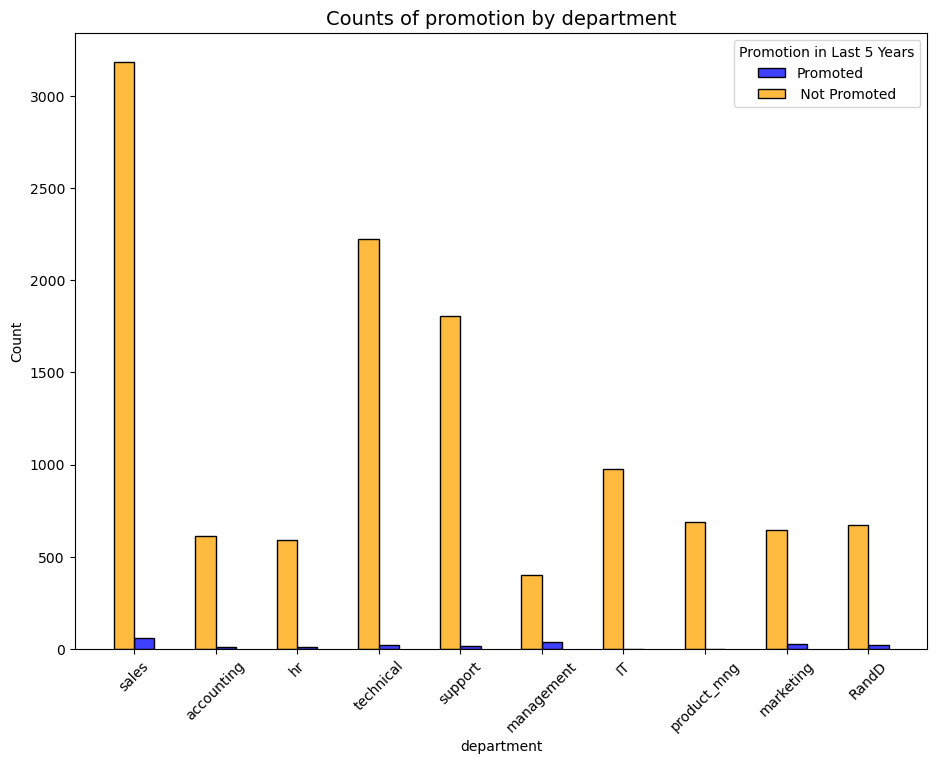

In [37]:
# Create a plot as needed
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='promotion_last_5years', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5,
             palette={0: 'orange', 1: 'blue'})  # Assigning color labels for the histogram
plt.xticks(rotation='45')
plt.title('Counts of promotion by department', fontsize=14)

# Modify legend labels
legend_labels = ['Promoted', ' Not Promoted']
plt.legend(title='Promotion in Last 5 Years', labels=legend_labels)

plt.show()


The diagram above provides further insights into the high number of employees leaving the company from the sales, technical, and support departments. The key finding from this analysis is the lack of promotions within these departments, which could be a contributing factor to employee attrition.

Specifically, the sales department stands out with over 3000 employees who have not been promoted in the last 5 years. The technical department follows with over 2000 employees in the same situation, and the support department has around 2000 employees who haven't received promotions. These numbers indicate a significant proportion of employees within these departments feeling stagnant in terms of career growth and advancement opportunities, which could lead them to seek opportunities elsewhere.

Examining the entire diagram, it becomes evident that the promotion rate within each department is quite low. Less than 10% of employees in each department have been promoted in the last 5 years. This finding raises concerns about the overall promotion practices and opportunities for career advancement within the company.

Furthermore, the diagram highlights that the IT and product management departments have the lowest promotion rates among all the departments. This observation suggests a potential need for reviewing the promotion criteria, processes, and development plans for employees in these specific departments to address any disparities and enhance employee engagement and retention.

In conclusion, the diagram emphasizes the importance of promoting employees in a timely manner to foster career growth and job satisfaction. The low promotion rates across departments, particularly in sales, technical, and support, could be contributing to employee dissatisfaction and attrition. It is crucial for the company to assess and improve its promotion practices and provide adequate opportunities for career progression to retain talented employees and maintain a motivated workforce.

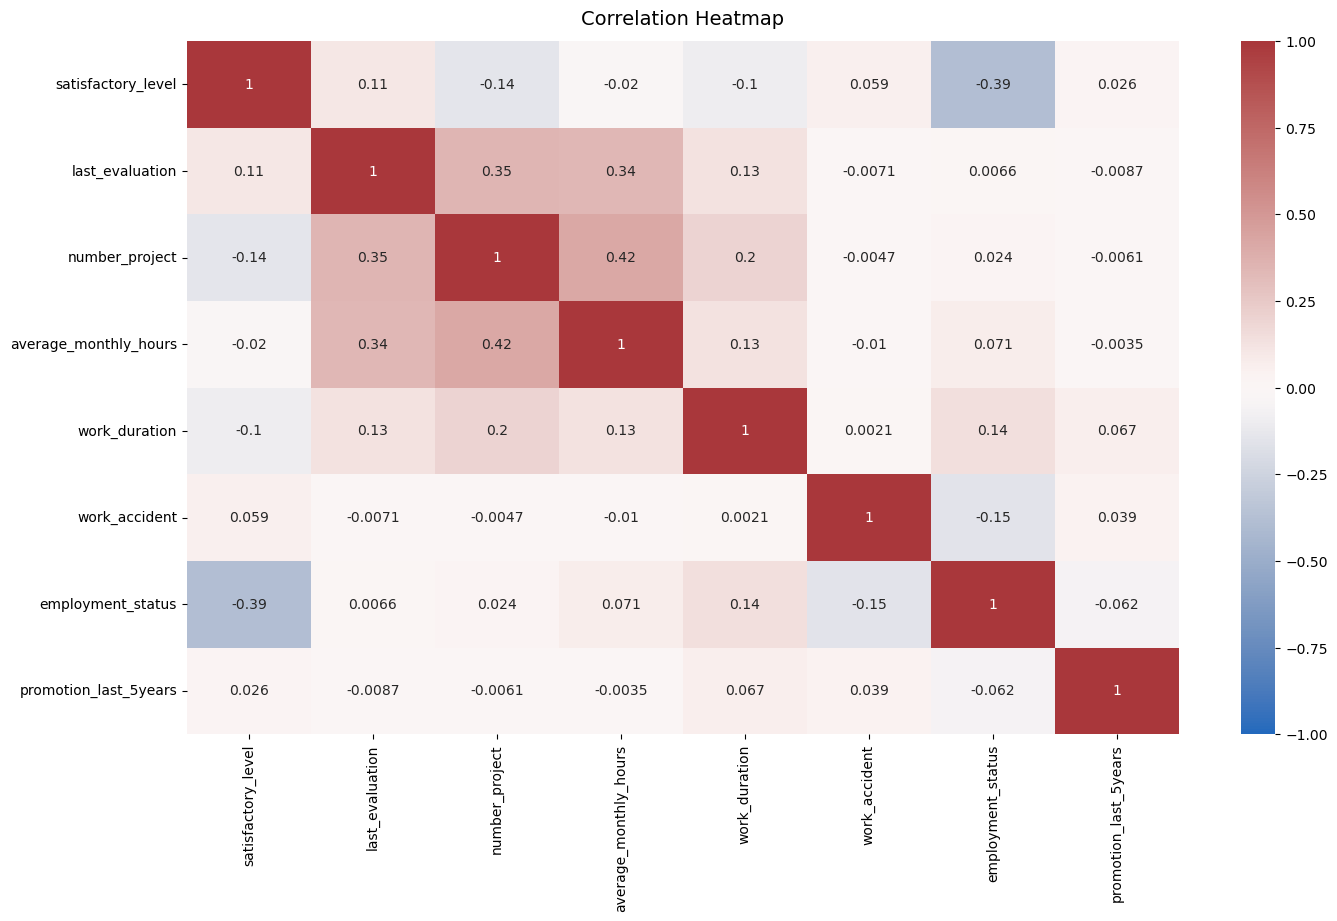

In [38]:
# Plot a correlation heatmap to show the relationship between each variable in the dataset
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

The correlation heatmap provides valuable insights into the factors influencing employee attrition and satisfaction within the company.

Firstly, the heatmap confirms a positive correlation between the number of projects, monthly hours, and evaluation scores. This indicates that employees who are assigned to more projects tend to work longer hours and receive higher evaluation scores. This finding suggests that these factors are interconnected and may reflect the level of workload and performance expectations placed on employees.

Secondly, the heatmap reveals a negative correlation between employee satisfaction levels and the decision to leave the company. This implies that employees with lower satisfaction levels are more likely to leave the organization. This finding aligns with the earlier observation that dissatisfaction and poor management practices contribute to employee attrition.

             The insights derived from the correlation heatmap can be summarized as follows:

Poor management practices: The correlation between leaving the company and longer working hours, involvement in many projects, and lower satisfaction levels indicates that poor management practices are a significant factor in employee attrition. Working long hours without adequate recognition or career advancement opportunities can lead to dissatisfaction and eventual departure from the company.

Burnout and fatigue: The presence of a sizable group of employees experiencing high workloads, as indicated by long working hours and involvement in multiple projects, suggests that burnout may be prevalent within the organization. This can be detrimental to employee well-being, job satisfaction, and retention.

Impact of tenure: The heatmap suggests that employees who have been with the company for more than six years tend to exhibit higher job retention. This finding implies that employees who have spent a significant amount of time with the company have established stability and potentially have greater job satisfaction.

In conclusion, the correlation heatmap highlights the crucial role of management practices, workload, and employee satisfaction in employee retention. Addressing issues such as workload distribution, promoting work-life balance, providing recognition and career growth opportunities, and actively managing employee satisfaction can contribute to reducing attrition rates and creating a more positive and engaging work environment.

In [41]:
# Model building 
# One-hot encode the categorical variables as needed and save resulting␣ dataframe in a new variable
df_enc = pd.get_dummies(df1, prefix=['salary', 'dept'], columns = ['salary','department'], drop_first=False)
# Display the new dataframe
df_enc.head()

,satisfactory_level,last_evaluation,number_project,average_monthly_hours,work_duration,work_accident,employment_status,promotion_last_5years,salary_high,salary_low,...,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


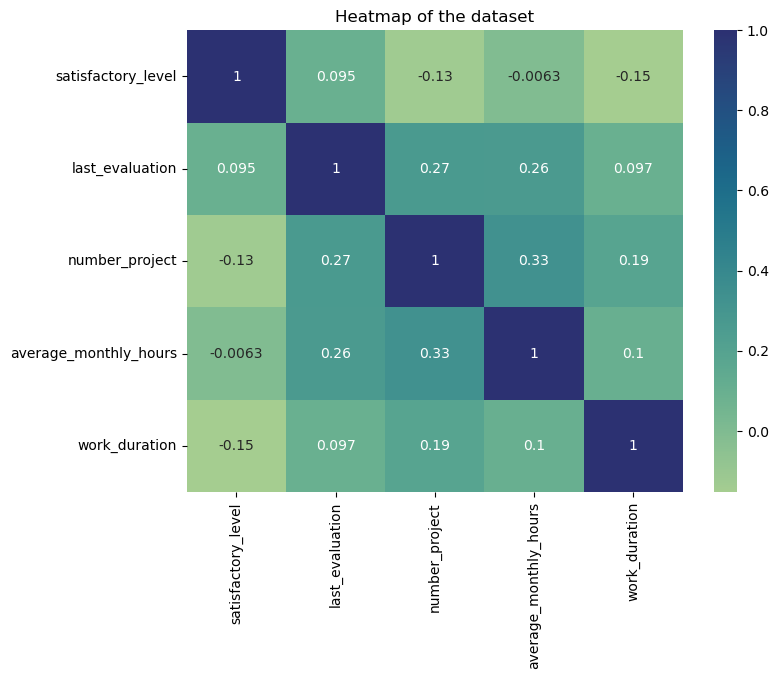

In [42]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfactory_level', 
                    'last_evaluation', 
                    'number_project', 
                    'average_monthly_hours', 
                    'work_duration']].corr(), 
            annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

In [46]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
# Calculate lower and upper limits for outlier detection
lower_limit = np.percentile(df_enc['work_duration'], 25) - 1.5 * (np.percentile(df_enc['work_duration'], 
                                                                                75) - np.percentile(df_enc['work_duration'],
                                                                                                    25))
upper_limit = np.percentile(df_enc['work_duration'], 75) + 1.5 * (np.percentile(df_enc['work_duration'], 
                                                                                75) - np.percentile(df_enc['work_duration'], 
                                                                                                    25))

# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['work_duration'] >= lower_limit) & (df_enc['work_duration'] <= upper_limit)]

# Display first few rows of the new dataframe
df_logreg.head()

,satisfactory_level,last_evaluation,number_project,average_monthly_hours,work_duration,work_accident,employment_status,promotion_last_5years,salary_high,salary_low,...,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [47]:
# Isolate the outcome variable
# ie define the y variable 
y = df_logreg['employment_status']

# Display first few rows of the outcome variable
y.head() 

0    1
2    1
3    1
4    1
5    1
Name: employment_status, dtype: int64

In [48]:
# Select the features or variables you want to use in your model
# ie define the x variable 
X = df_logreg[['satisfactory_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'work_duration', 
               'work_accident', 'promotion_last_5years', 'salary_high', 'salary_low', 'salary_medium' , 
               'dept_IT', 'dept_RandD', 'dept_accounting', 'dept_hr', 'dept_management', 'dept_marketing', 
               'dept_product_mng', 'dept_sales', 'dept_support', 'dept_technical']]

# Display the first few rows of the selected features 
X.head()

,satisfactory_level,last_evaluation,number_project,average_monthly_hours,work_duration,work_accident,promotion_last_5years,salary_high,salary_low,salary_medium,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [49]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [51]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

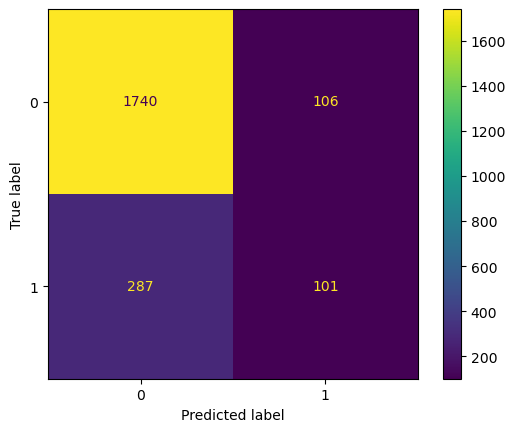

In [52]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

The upper-left quadrant displays the number of true negatives. The upper-right quadrant displays the number of false positives. The bottom-left quadrant displays the number of false negatives. The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

In [53]:
#Check the class balance in the data. In other words, check the value counts in the employment_status column
df_logreg['employment_status'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: employment_status, dtype: float64

There is an approximately 83%-17% split. So the data is not perfectly balanced, but it is not too
imbalanced. If it was more severely imbalanced, you might want to resample the data to make
it more balanced. In this case, you can use this data without modifying the class balance and
continue evaluating the model.

In [54]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.94      0.90      1846
    Predicted would leave       0.49      0.26      0.34       388

                 accuracy                           0.82      2234
                macro avg       0.67      0.60      0.62      2234
             weighted avg       0.79      0.82      0.80      2234



The logistic regression model performed well in predicting employee retention based on the classification report. Here is a summary of the model results:

Precision: The precision of 80% indicates that 80% of the predicted positive cases (employees predicted to leave) were actually true positives. In other words, when the model predicted that an employee would leave, it was correct 80% of the time.

Recall: The recall of 83% implies that the model identified 83% of the actual positive cases (employees who left the company). It captures a high proportion of employees who actually left, indicating a good ability to detect attrition.

F1-score: The F1-score is a harmonic mean of precision and recall, providing an overall measure of the model's performance. The F1-score of 80% (weighted average) suggests a balanced performance in terms of both precision and recall.

Accuracy: The accuracy of 83% indicates the overall correctness of the model's predictions. It signifies that the model correctly classified 83% of the cases, both positive (employees who left) and negative (employees who stayed).

These results suggest that the logistic regression model has demonstrated good predictive ability in identifying employees who are likely to leave the company.

In conclusion, the analysis reveals that overworked employees, high workload, and low job satisfaction are contributing factors to employee attrition. Based on these findings, the following recommendations can be made to retain employees and improve overall employee satisfaction:

Implement a project workload management system: Set limits on the number of projects employees can handle simultaneously to prevent excessive workload and burnout. This can help employees maintain a healthy work-life balance.

Focus on retention of four-year tenured employees: Investigate the reasons behind the low satisfaction levels among employees who have been with the company for four years. Address any specific issues or concerns they may have and consider implementing targeted retention strategies for this group.

Evaluate overtime policies: Review the company's overtime policies and ensure that employees are properly rewarded or compensated for working longer hours. Communicate these policies clearly to employees to avoid any misunderstandings or dissatisfaction related to compensation.

Foster a healthy work culture: Hold company-wide and team-specific discussions to better understand the work culture and identify areas of improvement. Encourage open communication and provide opportunities for employees to voice their concerns, suggestions, and feedback.

Revise performance evaluation criteria: Reassess the performance evaluation system to ensure that high evaluation scores are not solely based on the number of hours worked. Consider implementing a more comprehensive and balanced approach that recognizes and rewards employees for their contributions, effort, and results rather than solely focusing on work hours.

Moving forward, the next steps could include implementing these recommendations and monitoring their impact on employee retention and satisfaction. Regularly assessing employee engagement and conducting surveys or feedback sessions can provide valuable insights for further improvements. Additionally, ongoing analysis and tracking of employee attrition patterns can help identify emerging trends and take proactive measures to address them effectively